https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ucimlrepo import fetch_ucirepo

In [2]:
df = pd.read_csv('diabetes.csv')
display(df.head())
print("Dataset Overview:")
print(df.info())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [3]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%     

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
# Check NaN values for df
print("Number of NaN values in the dataset: ", df.isnull().sum().sum())

# Drop rows with NaN values
df = df.dropna()

# Check NaN values again
print("Number of NaN values in the dataset: ", df.isnull().sum().sum())

Number of NaN values in the dataset:  0
Number of NaN values in the dataset:  0


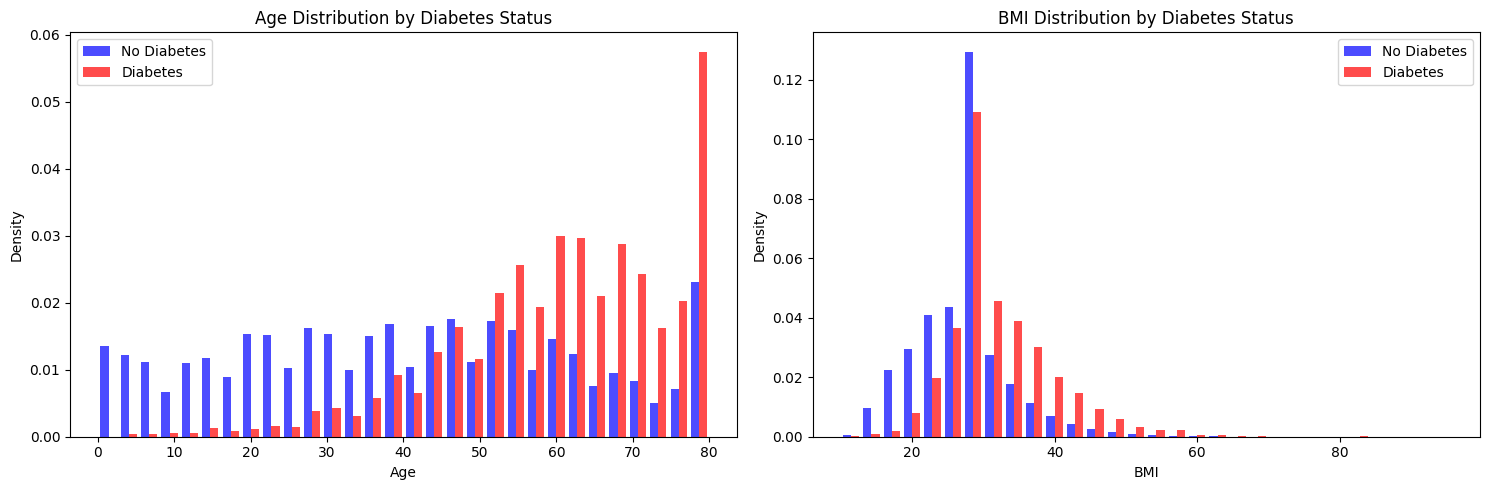

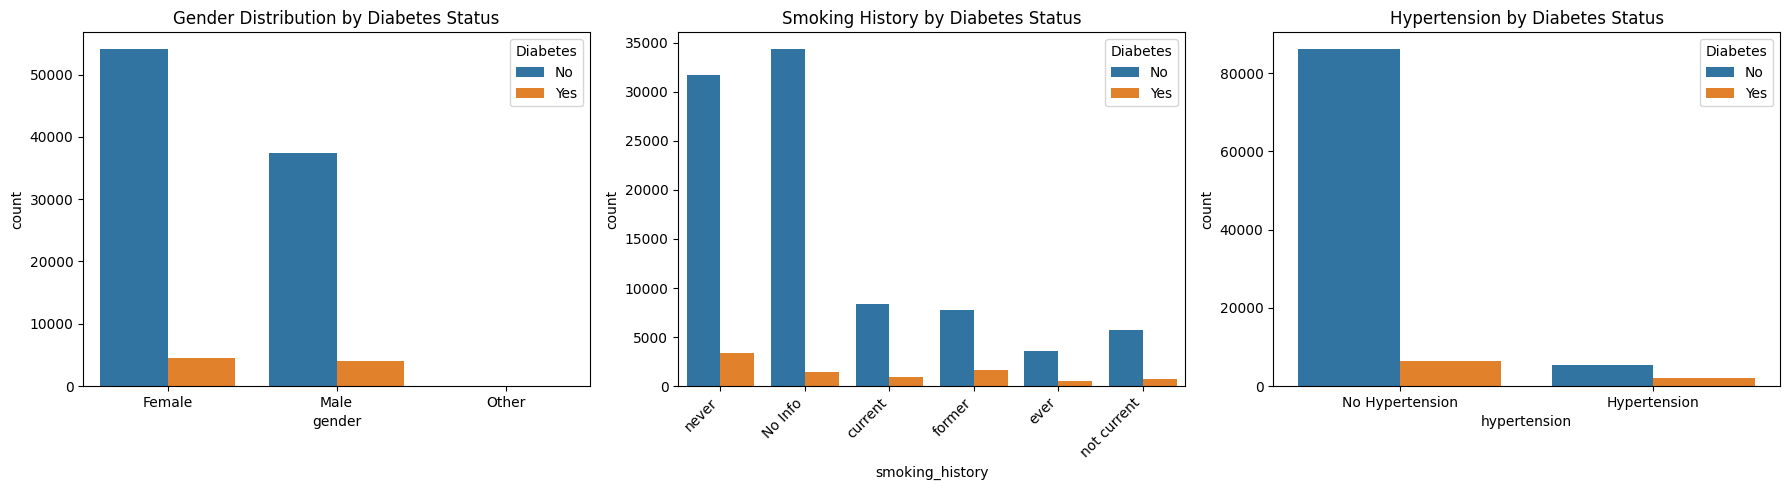

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Age distribution
axes[0].hist([df[df['diabetes']==0]['age'], df[df['diabetes']==1]['age']], 
             bins=30, label=['No Diabetes', 'Diabetes'], alpha=0.7, color=['blue', 'red'], density=True)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
axes[0].set_title('Age Distribution by Diabetes Status')
axes[0].legend()

# BMI distribution
axes[1].hist([df[df['diabetes']==0]['bmi'], df[df['diabetes']==1]['bmi']], 
             bins=30, label=['No Diabetes', 'Diabetes'], alpha=0.7, color=['blue', 'red'], density=True)
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Density')
axes[1].set_title('BMI Distribution by Diabetes Status')
axes[1].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='gender', hue='diabetes', ax=axes[0])
axes[0].set_title('Gender Distribution by Diabetes Status')
axes[0].legend(title='Diabetes', labels=['No', 'Yes'])

sns.countplot(data=df, x='smoking_history', hue='diabetes', ax=axes[1])
axes[1].set_title('Smoking History by Diabetes Status')
axes[1].tick_params(axis='x', rotation=45)
for label in axes[1].get_xticklabels():
    label.set_ha('right')
axes[1].legend(title='Diabetes', labels=['No', 'Yes'])

sns.countplot(data=df, x='hypertension', hue='diabetes', ax=axes[2])
axes[2].set_title('Hypertension by Diabetes Status')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['No Hypertension', 'Hypertension'])
axes[2].legend(title='Diabetes', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

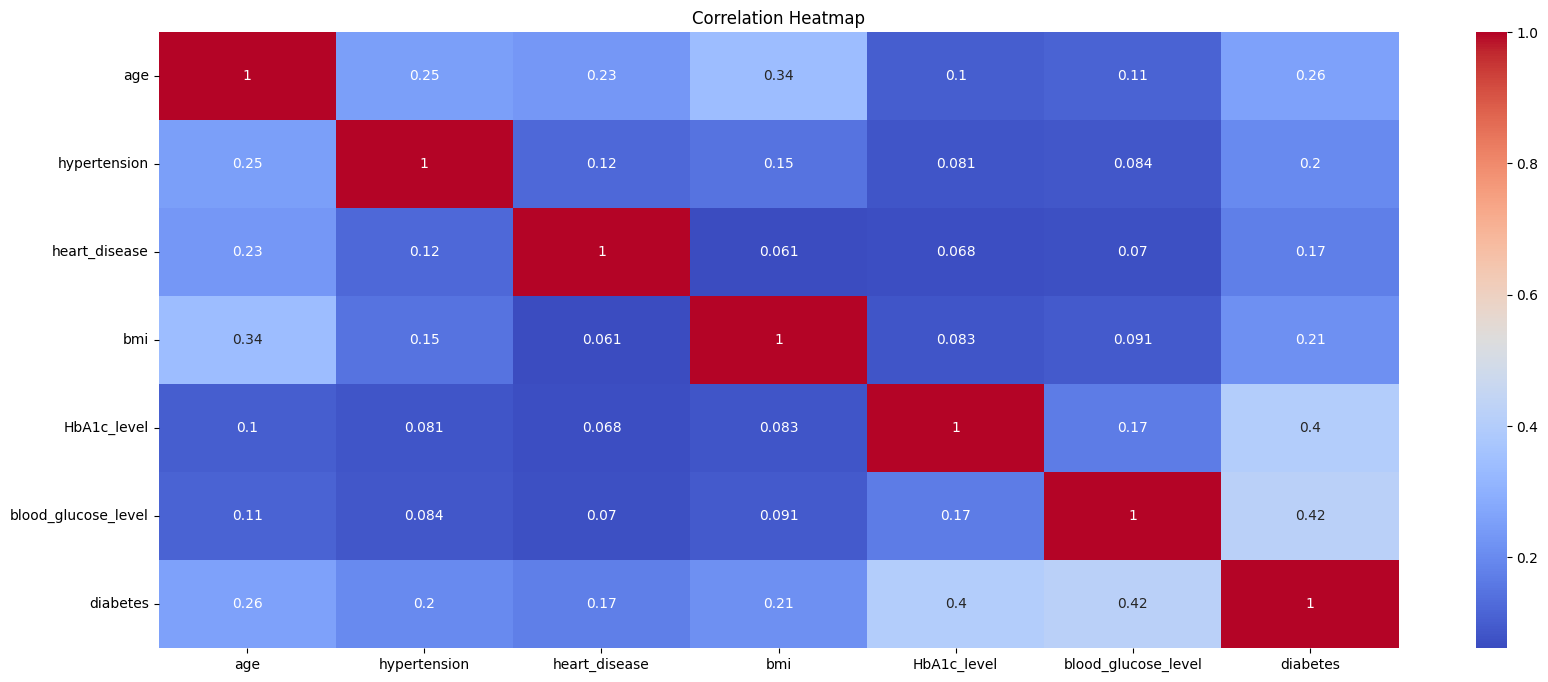

In [7]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(20, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# Check NaN values for df
print("Number of NaN values in the dataset: ", df.isnull().sum().sum())

# Drop rows with NaN values
df = df.dropna()

# Check NaN values again
print("Number of NaN values in the dataset: ", df.isnull().sum().sum())

Number of NaN values in the dataset:  0
Number of NaN values in the dataset:  0


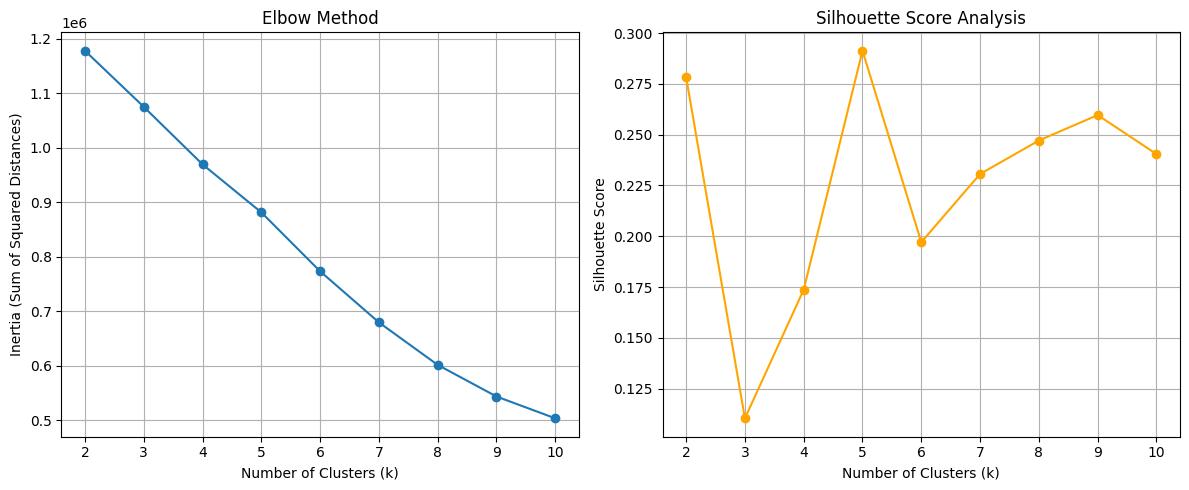

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("diabetes.csv")

# Drop the target 'diabetes' to cluster only on patient features
X = df.drop('diabetes', axis=1)
# One-Hot Encode categorical features (gender, smoking_history)
data = pd.get_dummies(X, columns=['gender', 'smoking_history'], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-Means Clustering Loop
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test clusters from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    
    # IMPORTANT: Use sample_size for large datasets to avoid long wait times
    score = silhouette_score(scaled_data, kmeans.labels_, sample_size=5000, random_state=42)
    silhouette_scores.append(score)

# Elbow Method
plt.figure(figsize=(12, 5))

# Plot 1: Elbow Curve (Inertia)
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method")
plt.grid(True)

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Final Model (choose k based on Elbow/Silhouette)
optimal_k = 5  # Replace with the chosen k from analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_data)

print(f"Clustering complete with k={optimal_k}")
print(f"\nCluster distribution:")
print(data['Cluster'].value_counts().sort_index())

Clustering complete with k=5

Cluster distribution:
Cluster
0     3942
1    72582
2     8444
3     6155
4     8877
Name: count, dtype: int64


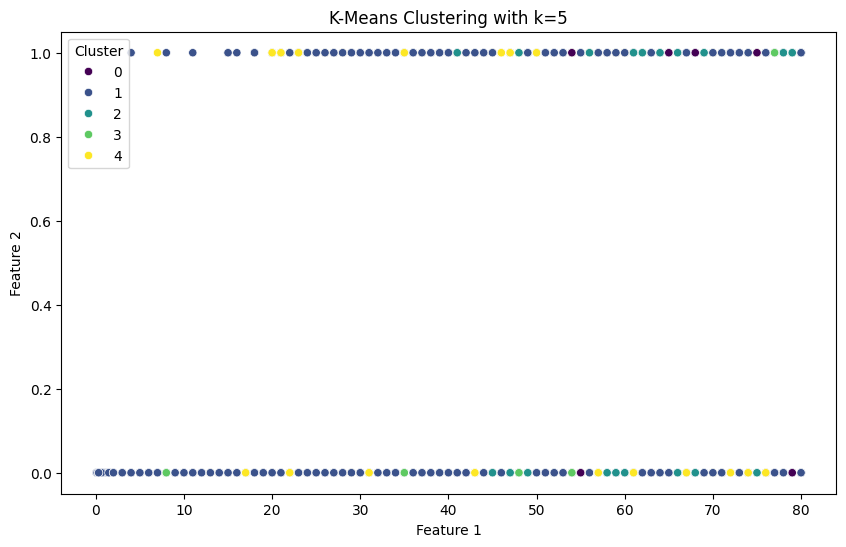

In [11]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['Cluster'], palette="viridis")
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

In [12]:
# Evaluate Final Model
print(f"Silhouette Score for k={optimal_k}: {silhouette_score(scaled_data, data['Cluster'], sample_size=5000, random_state=42)}")

Silhouette Score for k=5: 0.2912971928381077


### PCA

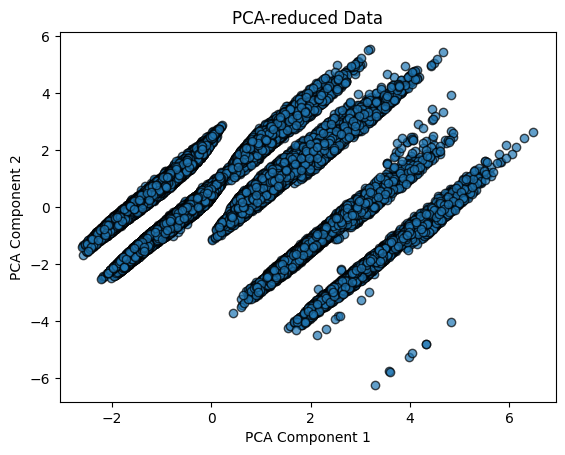

In [17]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

# Visualize PCA-reduced data
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA-reduced Data')
plt.show()

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


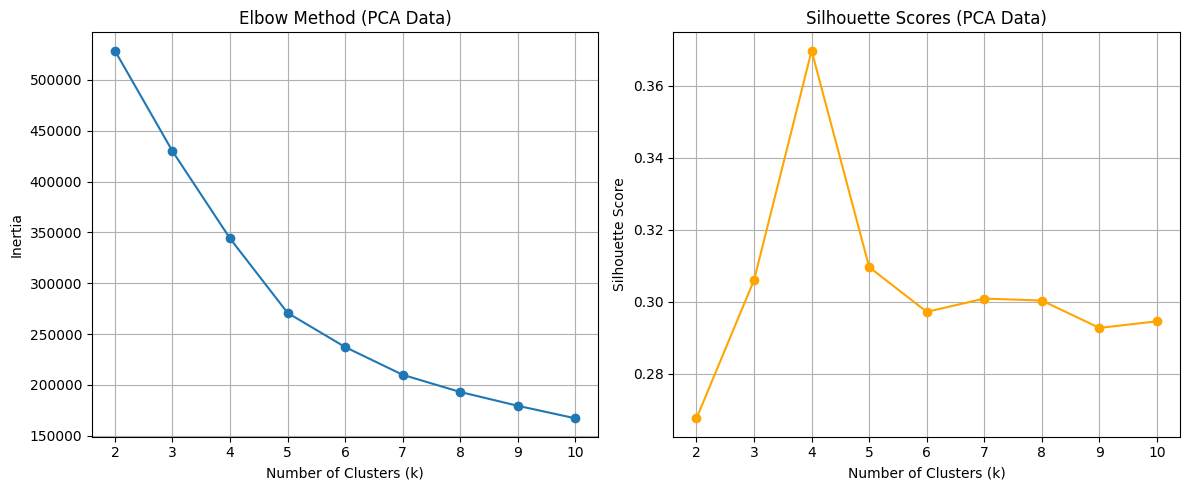

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv("diabetes.csv")

X = df.drop('diabetes', axis=1)
X_processed = pd.get_dummies(X, columns=['gender', 'smoking_history'], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_processed)

# Reduce the data to 5 Principal Components for faster and cleaner clustering
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)
variance_retained = np.sum(pca.explained_variance_ratio_)

inertia = []
silhouette_scores = []
k_values = range(2, 11) 

for k in k_values:
    # Use n_init=10 explicitly to suppress warnings
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score using sampling for efficiency on large data
    score = silhouette_score(pca_data, kmeans.labels_, sample_size=2000, random_state=42)
    silhouette_scores.append(score)
    
# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (PCA Data)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores (PCA Data)')
plt.grid(True)

plt.tight_layout()
plt.savefig("pca_kmeans_elbow_silhouette.png")

print(df.head())

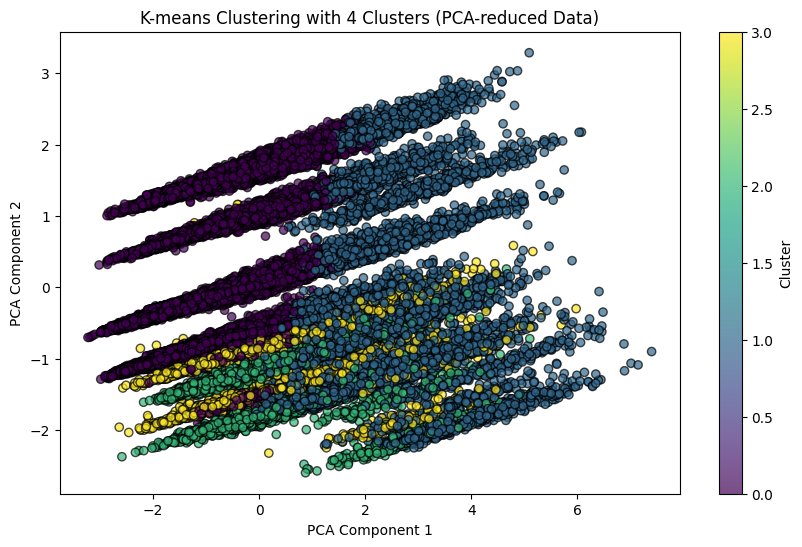


Cluster distribution:
0    64977
1    19336
2     9260
3     6427
Name: count, dtype: int64


In [19]:
optimal_k = 4  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(pca_data)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the clustered PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with {optimal_k} Clusters (PCA-reduced Data)')
plt.colorbar(label='Cluster')
plt.show()

print(f"\nCluster distribution:")
print(pd.Series(kmeans.labels_).value_counts().sort_index())

C:\Users\zymic\AppData\Local\Temp\ipykernel_84620\250630682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set3')


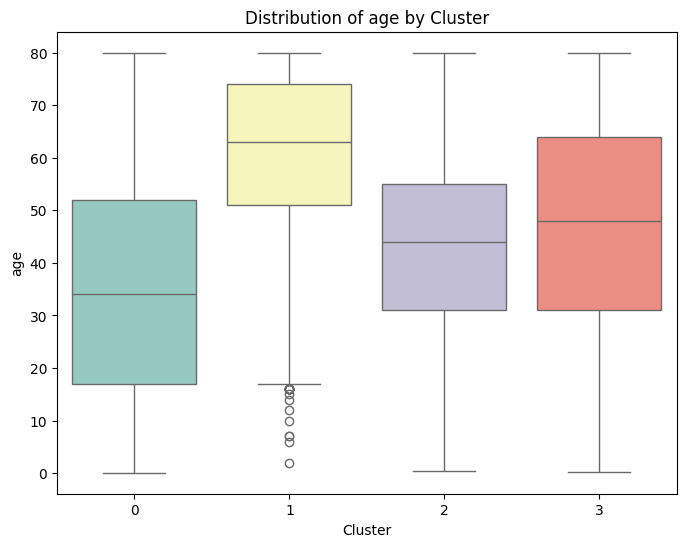

C:\Users\zymic\AppData\Local\Temp\ipykernel_84620\250630682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set3')


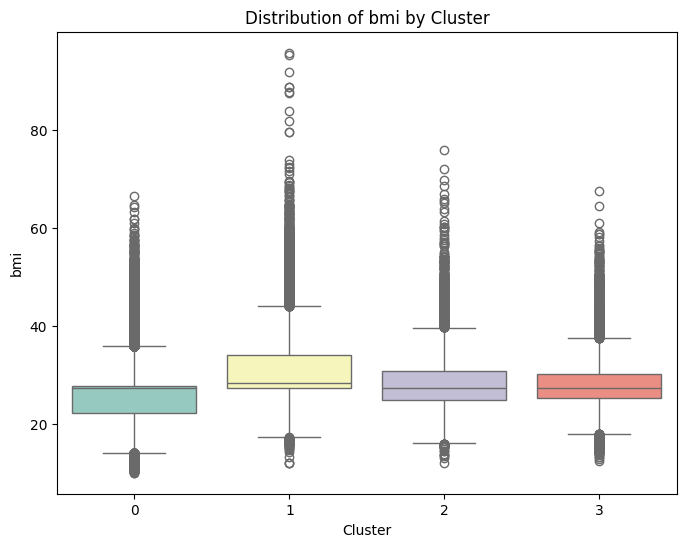

C:\Users\zymic\AppData\Local\Temp\ipykernel_84620\250630682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set3')


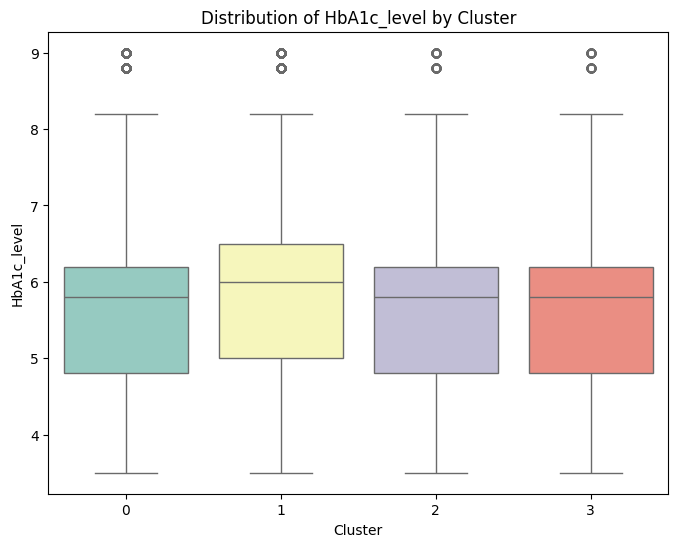

C:\Users\zymic\AppData\Local\Temp\ipykernel_84620\250630682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set3')


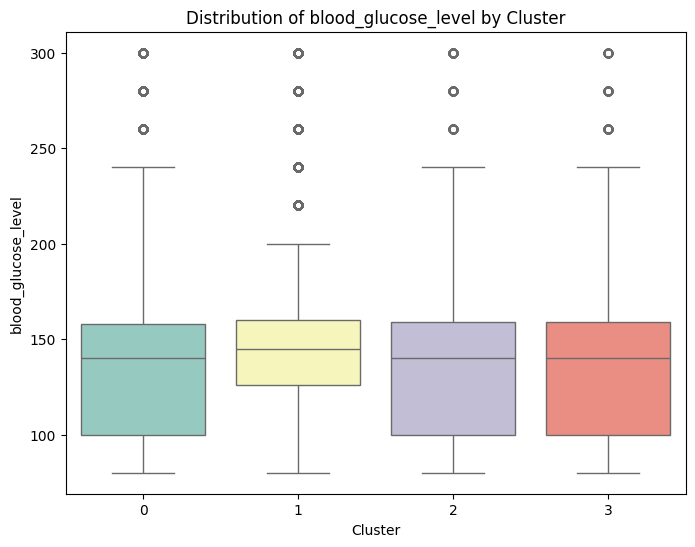

In [20]:
# Analyze feature distributions by cluster
# Add cluster labels to the original dataframe for analysis
df['Cluster'] = kmeans.labels_

# Select key features from the diabetes dataset to plot
features_to_plot = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='Set3')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

This grouped the users into 4 groups:
1) younger, healthier users with normal sugar levels
2) older users with higher blood sugar levels
3) users with higher BMI but normal sugar levels
4) users with multiple risk factors

The results match the expectations. Diabetic patients aren't all the same, some are high-risk, some are borderline, and some are healthy (some might need immediate care, and some might just need monitoring). Thus, different groups need different advices for best result and improvements. This can help with personalized risk profiles for users and provide better recommendations - each cluster can give different advice (older & high sugar level: talk to doctor soon, focus more on blood sugar control), (high BMI: consider weight management and exercise more)... Users will also feel more trustworthy when we explain why they're at risk instead of just giving them a number.

K-Means: discrete, find similar patients, which group user is in
- results where clear groups of similar features are grouped together, but can have too many details (all 13 features)
- give actual groups users can understand

PCA: continuous, simplify data, what feature user score higher on
- organized into larger categories rather than the 13 (BMI, gender, age...), combines different features into groupings
- result is easier to understanding but still don't know which exact feature is the cause
- easier to computer to process

Best to use PCA to clean up with 13 features into larger categories. Then use K-means to group for users to understand easier, giving cleaner and better groups.

### Feature Importance Analysis

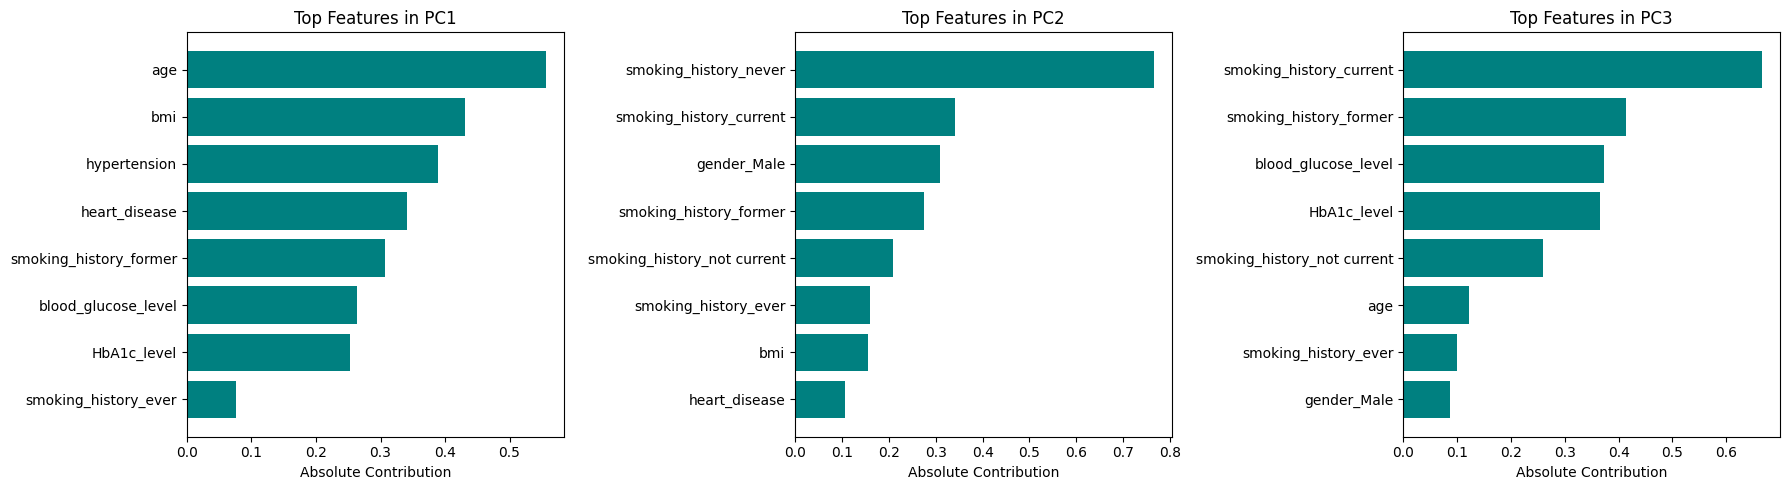

PC1 (Component 1) might represent: metabolic health (glucose, HbA1c, age)
PC2 (Component 2) might represent: body composition (BMI, age)
PC3 (Component 3) might represent: cardiovascular risk factors


In [27]:
# This shows what each group actually represents

# Get PCA loadings (how much each original feature contributes to each component)
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_processed.columns,
    index=[f'PC{i+1}' for i in range(5)]
)

# Show top contributing features for first 3 components
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    pc_loadings = pca_components.iloc[i].abs().sort_values(ascending=False).head(8)
    axes[i].barh(range(len(pc_loadings)), pc_loadings.values, color='teal')
    axes[i].set_yticks(range(len(pc_loadings)))
    axes[i].set_yticklabels(pc_loadings.index)
    axes[i].set_xlabel('Absolute Contribution')
    axes[i].set_title(f'Top Features in PC{i+1}')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

print("PC1 (Component 1) might represent: metabolic health (glucose, HbA1c, age)")
print("PC2 (Component 2) might represent: body composition (BMI, age)")
print("PC3 (Component 3) might represent: cardiovascular risk factors")

Cluster Profiles (Mean Values):
           age    bmi  HbA1c_level  blood_glucose_level  hypertension  \
Cluster                                                                 
0        35.32  26.02         5.43               134.14          0.01   
1        61.07  30.85         5.82               150.11          0.30   
2        43.98  28.43         5.54               139.50          0.09   
3        47.56  28.20         5.56               139.35          0.07   

         heart_disease  
Cluster                 
0                 0.00  
1                 0.17  
2                 0.04  
3                 0.04  




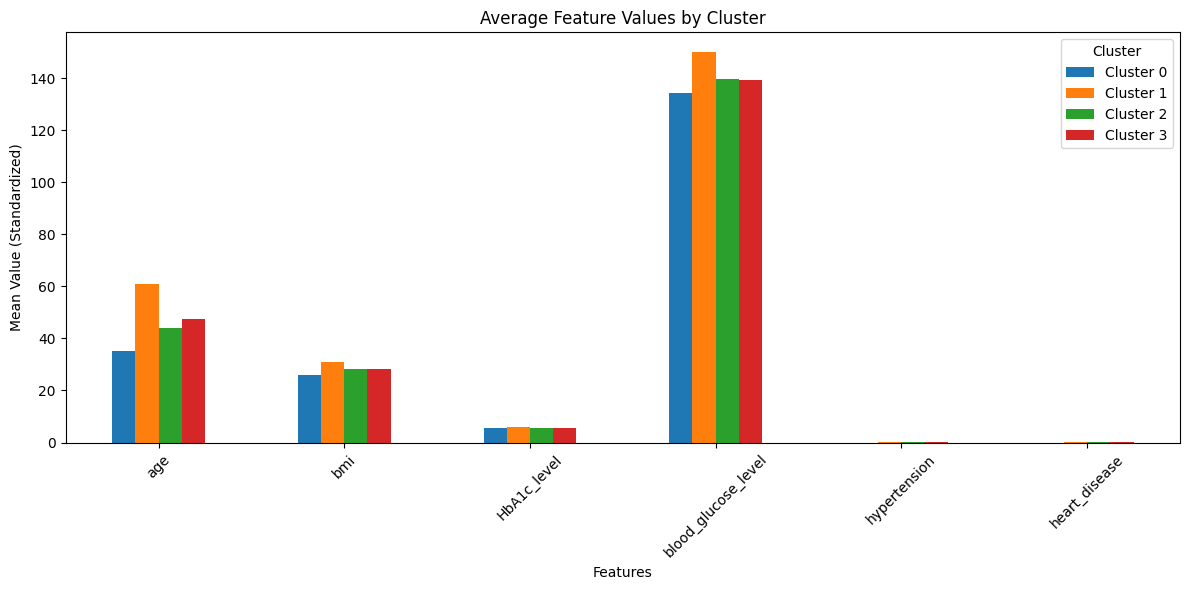

Most distinguishing features (highest variance across clusters):
age                    114.685017
blood_glucose_level     44.924521
bmi                      3.903467
HbA1c_level              0.026419
hypertension             0.016334
heart_disease            0.005484
dtype: float64


In [ ]:
# Which features best separate the 4 clusters?
# Calculate mean values for each cluster

cluster_profiles = df.groupby('Cluster')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 
                                            'hypertension', 'heart_disease']].mean()

print("Cluster Profiles (Mean Values):")
print(cluster_profiles.round(2))
print("\n")

# Visualize cluster profiles
cluster_profiles.T.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Average Feature Values by Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value (Standardized)')
plt.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.tight_layout()
plt.show()

feature_variance = cluster_profiles.var()
print("Most distinguishing features (highest variance across clusters):")
print(feature_variance.sort_values(ascending=False))

### Comparing Different Numbers of Clusters

In [28]:
# Compare k=3, k=4, and k=5 to see how patient groupings change

k_values_to_compare = [3, 4, 5]
results = {}

for k in k_values_to_compare:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(pca_data)
    results[k] = {
        'labels': labels,
        'silhouette': silhouette_score(pca_data, labels, sample_size=2000, random_state=42),
        'inertia': kmeans_temp.inertia_
    }

# Print comparison
print("Comparison of Different k Values:\n")
print(f"{'k':<5} {'Silhouette Score':<20} {'Inertia':<15} {'Cluster Sizes'}")
print("-" * 70)

for k, result in results.items():
    cluster_counts = pd.Series(result['labels']).value_counts().sort_index().tolist()
    print(f"{k:<5} {result['silhouette']:<20.4f} {result['inertia']:<15.2f} {cluster_counts}")

print("- k=3: Fewer, broader groups (e.g., Low/Medium/High risk)")
print("- k=4: Balanced detail (CURRENT CHOICE - good separation)")
print("- k=5: More specific groups but some might be too small or overlapping")

Comparison of Different k Values:

k     Silhouette Score     Inertia         Cluster Sizes
----------------------------------------------------------------------
3     0.3060               429787.06       [60978, 9286, 29736]
4     0.3697               343989.62       [64977, 19336, 9260, 6427]
5     0.3096               270821.89       [34448, 35950, 6429, 13887, 9286]
- k=3: Fewer, broader groups (e.g., Low/Medium/High risk)
- k=4: Balanced detail (CURRENT CHOICE - good separation)
- k=5: More specific groups but some might be too small or overlapping


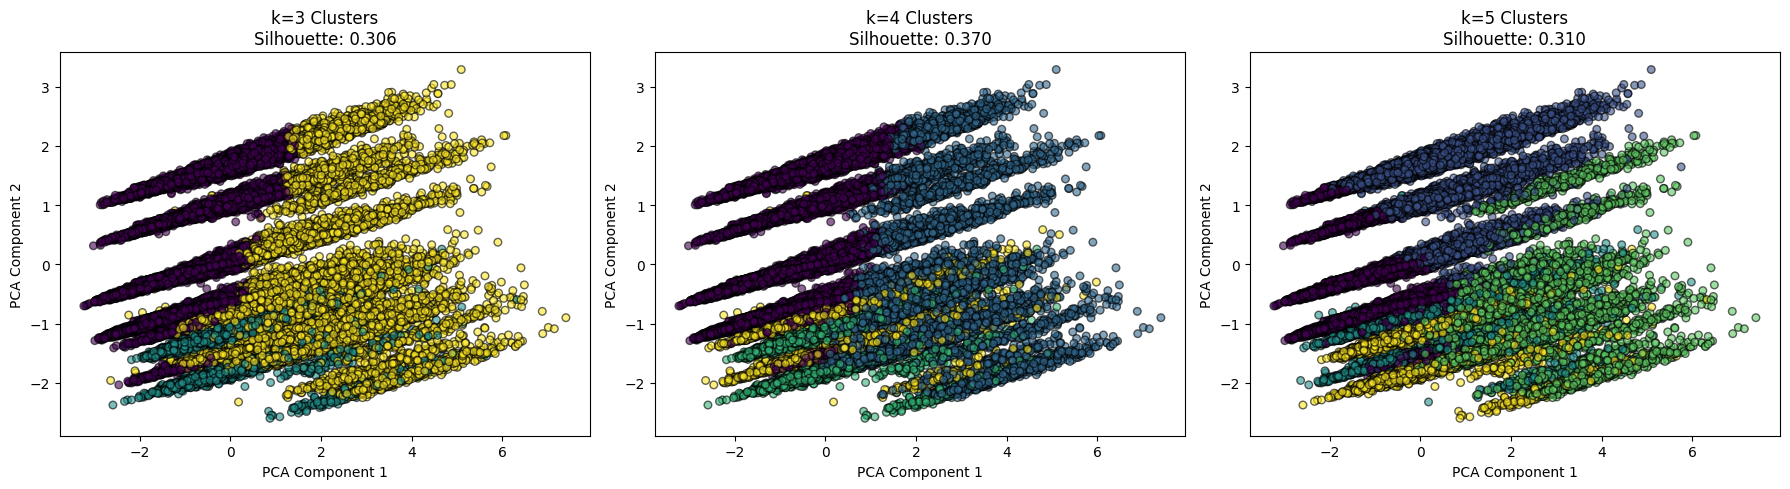

In [26]:
# Visualize side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate(k_values_to_compare):
    axes[idx].scatter(pca_data[:, 0], pca_data[:, 1], 
                     c=results[k]['labels'], cmap='viridis', alpha=0.6, edgecolor='k', s=30)
    axes[idx].set_xlabel('PCA Component 1')
    axes[idx].set_ylabel('PCA Component 2')
    axes[idx].set_title(f'k={k} Clusters\nSilhouette: {results[k]["silhouette"]:.3f}')

plt.tight_layout()
plt.show()

k=3 creates very broad groups, k=4 has well-separated clusters, and k=5 starts to split some groups that might actually be similar

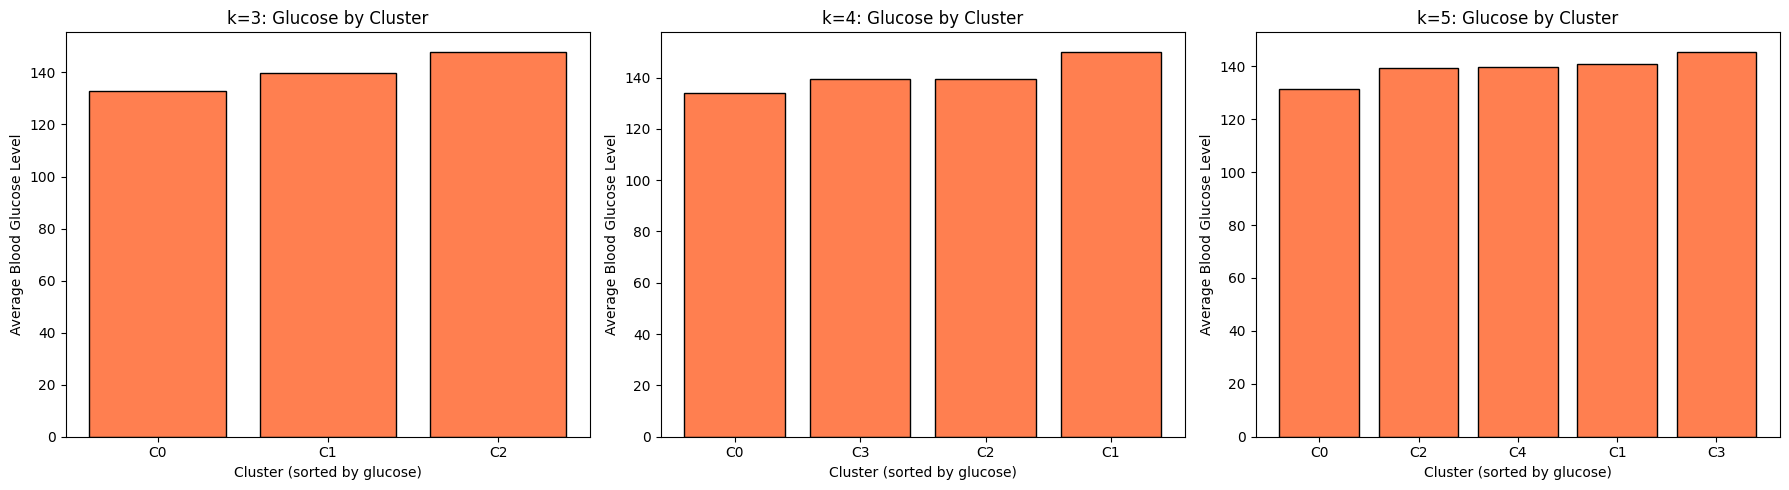

In [29]:
# Compare cluster characteristics across different k values
# For k=3, 4, 5: what are the average glucose levels in each cluster?

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate(k_values_to_compare):
    temp_df = df.copy()
    temp_df['Cluster_temp'] = results[k]['labels']
    
    cluster_means = temp_df.groupby('Cluster_temp')['blood_glucose_level'].mean().sort_values()
    
    axes[idx].bar(range(len(cluster_means)), cluster_means.values, color='coral', edgecolor='black')
    axes[idx].set_xlabel('Cluster (sorted by glucose)')
    axes[idx].set_ylabel('Average Blood Glucose Level')
    axes[idx].set_title(f'k={k}: Glucose by Cluster')
    axes[idx].set_xticks(range(len(cluster_means)))
    axes[idx].set_xticklabels([f'C{i}' for i in cluster_means.index])

plt.tight_layout()
plt.show()

k=4: clear risk tiers (low/medium/high/very-high glucose groups)

k=3: some medium & high-risk patients get lumped together

k=5: split groups that are already similar, which may confuse users